In [ ]:
import os
import cv2
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Define the hand gesture classes
gesture_classes = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

In [ ]:
# Step 3: Load and preprocess images for each hand gesture class
images = []
labels = []

In [ ]:
for i, gesture_class in enumerate(gesture_classes):
    gesture_folder = f'/content/drive/MyDrive/hand_gesture/{gesture_class}'
    for image_name in os.listdir(gesture_folder):
        image_path = os.path.join(gesture_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # If needed
        image = cv2.resize(image, (224, 224))  # Adjust size as needed
        image = image / 255.0  # Normalize pixel values
        images.append(image)
        labels.append(i)

In [ ]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(gesture_classes), activation='softmax')  # Number of classes
])

Epoch 1/10
50/50 [==============================] - 117s 2s/step - loss: 1.7087 - accuracy: 0.7862 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 2/10
50/50 [==============================] - 116s 2s/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 114s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.5686e-04 - val_accuracy: 1.0000
Epoch 4/10
50/50 [==============================] - 118s 2s/step - loss: 5.9275e-04 - accuracy: 1.0000 - val_loss: 5.9778e-04 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 170s 3s/step - loss: 3.4422e-04 - accuracy: 1.0000 - val_loss: 4.7888e-04 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 174s 3s/step - loss: 2.3967e-04 - accuracy: 1.0000 - val_loss: 3.2059e-04 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 132s 3s/step - loss: 1.7407e-04 - accuracy: 1.0000 - val_loss: 2.5555e-04 

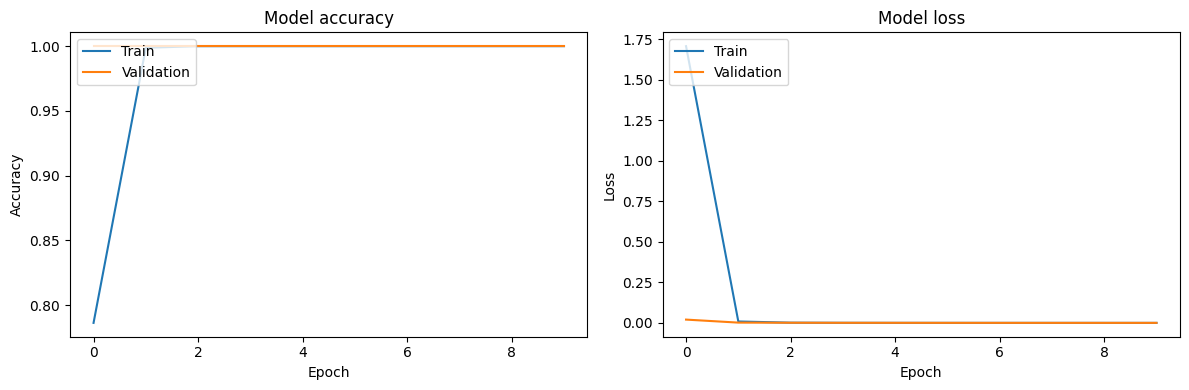

In [ ]:
import matplotlib.pyplot as plt

# Step 6: Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and keep track of training history
history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print(f"Test accuracy: {test_acc}")

13/13 [==============================] - 7s 501ms/step - loss: 1.4910e-04 - accuracy: 1.0000
Test accuracy: 1.0


Enter the path of the image you want to predict: /content/drive/MyDrive/hand_gesture/04_fist_moved/frame_00_04_0001.png
1/1 [==============================] - 0s 72ms/step
Predicted class: 04_fist_moved


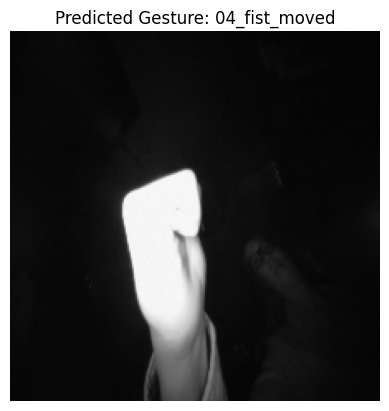

In [ ]:
user_image_path = input("Enter the path of the image you want to predict: ")
user_image = cv2.imread(user_image_path)
user_image = cv2.cvtColor(user_image, cv2.COLOR_BGR2RGB)
user_image_resized = cv2.resize(user_image, (224, 224))  # Resize user input image
user_image_resized = user_image_resized / 255.0  # Normalize pixel values



# Make a prediction
user_image_input = np.expand_dims(user_image_resized, axis=0)
prediction = model.predict(user_image_input)
predicted_class_index = np.argmax(prediction)
predicted_class = gesture_classes[predicted_class_index]

print(f"Predicted class: {predicted_class}")

import matplotlib.pyplot as plt

plt.imshow(user_image_resized)
plt.title(f"Predicted Gesture: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
pip install opencv-python
